<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/800x800-04.jpg" height="200" width="300"> 

# <center> R для тервера и матстата. <br>  <br> 1.2 Генерация распределений. </center>


Данный ноутбук является конспектом по курсу «R для теории вероятностей и математической статистики» (РАНХиГС, 2017-2018). Автор ноутбука [вот этот парень по имени Филипп.](https://vk.com/ppilif) Если у вас для него есть деньги, слава или женщины, он от этого всего не откажется. Ноутбук распространяется на условиях лицензии [Creative Commons Attribution-Share Alike 4.0.](https://creativecommons.org/licenses/by-sa/4.0/) При использовании обязательно упоминание автора курса и аффилиации. При наличии технической возможности необходимо также указать активную гиперссылку на [страницу курса.](https://fulyankin.github.io/R_probability/) На ней можно найти другие материалы. Фрагменты кода, включенные в этот notebook, публикуются как [общественное достояние.](https://creativecommons.org/publicdomain/zero/1.0/)

---------------

Вы будете в шоке, но на самом деле R ориентирован на статитсику и всё что с ней связано! Пора бы поизучать его с этой точки зрения...  Подгружать пакеты для разных красивостей можно командой `library`. Вы должны знать об этом с первого курса...

In [7]:
library("ggplot2")  # Пакет для красивых графиков 
     
# Если вы работаете в R-studio, вы можете избежать подгрузки пакетов ниже
# Отрегулируем размер картинок, которые будут выдаваться в нашей тетрадке
library('repr') 
library("grid")  # Пакет для субплотов
options(repr.plot.width=4, repr.plot.height=3)

## 1. Генерим случайные величины 

Иногда для решения задач по теории вероятностей или исследования свойств статистических алгоритмов нужно сгенерировать случайную выборку из какого-нибудь распределения. Чтобы сварить в R любую случайную величину, нужно знать четыре буквы: r, d, p и q. 

Посмотрим как это работает на примере **нормального распределения**. Того самого распределения, плотность которого выглядит как-то вот так: 

$$
f(x) = \frac{1}{\sigma \sqrt{2 \pi}} \cdot  e^{-\frac{(x - \mu)^2}{2 \sigma^2}}
$$

* `rnorm` эта команда сгенерирует выборку из нормального распределения
* `dnorm` эта команда вычислит значение плотности в указанной точке
* `pnorm` эта команда находит вероятность 
* `qnorm` эта команда находит квантили 

Аналогично можно работать со многими другими распределениями. Нужно только загуглить названия этих распределений. Например, команда `rchisq` всё ещё генерирует выборку, но уже из распределения хи-квадрат. 

Сгенерируем случайную величину из нормального распределения с математическим ожиданием $5$ и дисперсией $9$. 

In [1]:
x <- rnorm(1000, mean=5, sd=3)  # если дисперсия 9, то стандартное отклонение 3
x[10:20]

[1]  5.888798468  6.167144539 -1.491677013  0.001808202  6.605394259
 [6]  3.056713429  3.558642499 -2.792941046 12.419174209  0.561784359
[11]  6.993901299

Мы можем посчитать какие-нибудь характеристики для нашей случайной величины! 

In [2]:
mean(x) # среднее выборочное (при больших n похоже на математическое ожидание)

[1] 4.969541

In [3]:
var(x) # выборочная дисперсия

[1] 9.115568

In [4]:
sd(x) # выборочное стандартное отклонение

[1] 3.0192

In [5]:
median(x) # выборочная медиана

[1] 4.920811

Также мы можем построить гистограмму!

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


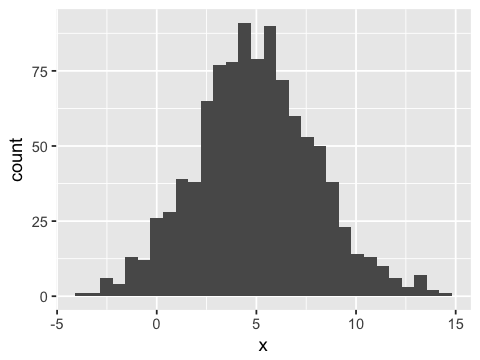

In [8]:
qplot(x) # гистограма 

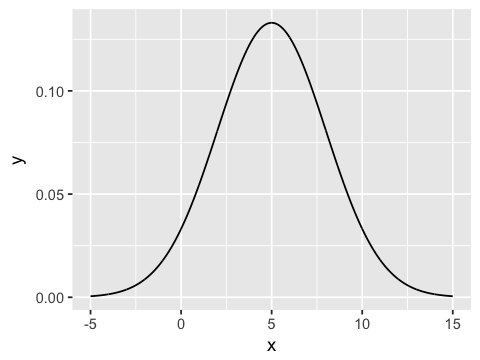

In [13]:
#построим функцию плотности
x <- seq(-5, 15, by=0.01)
y <- dnorm(x, mean=5, sd=3)
qplot(x, y, geom="line")

Найдём вероятность того, что нормально распределённая случайная величина с выбранными параметрами примет значение меньше $3$!

$$ P(X < 3) = \int_{-\infty}^3 f(x)dx = F(3)$$

In [14]:
pnorm(3, mean=5, sd=3)

[1] 0.2524925

А теперь найдём ещё одну вероятность! 

$$ P(4 < X < 9) = \int_4^9 f(x) dx = F(9) - F(4)$$

In [15]:
pnorm(9, mean=5, sd=3) - pnorm(4, mean=5, sd=3)

[1] 0.5393474

Для полноты картины осталось только найти какой-нибудь квантиль! Не будем забывать о том, что квантиль уровня $\gamma$ это такое число $q$, что 

$$P(X < q) = \gamma$$

In [16]:
qnorm(0.7, mean=5, sd=3)

[1] 6.573202

Можно использовать R как весёлый калькулятор для поиска квантелей нормального распределения при проверке гипотез!

In [17]:
x <- c(0.95, 0.975, 0.995)
qnorm(x, mean = 0, sd = 1)

[1] 1.644854 1.959964 2.575829

Давайте попробуем получить те же самые квантили, но для распределения Стьюдента! 

In [18]:
x <- c(0.95, 0.975, 0.995)
qt(x, df=10)

[1] 1.812461 2.228139 3.169273

Остался один вопрос на засыпку. А что сгенерирует команда `rnorm(20)`? 

In [19]:
rnorm(20)

[1]  0.52395521  3.37607659 -1.00706854  2.49603683  2.14126800  1.16601130
 [7] -1.14062101 -0.27785634  1.00761736 -0.90677758 -1.32359058 -0.01321904
[13]  0.19447944 -1.61968396 -2.33688898  0.31723689 -0.36360027  0.30634211
[19]  0.76491512 -0.72096356

## 2. Зачем это надо? 

Чтобы решать рельные проблемы! Например, с помощью R можно оценить математическое ожидание случайной величины $\frac{1}{X}$, где $X \sim N(5; 3)$ без взятия страшных интегралов. Для этого надо лишь вспомнить [Закон Больших Чисел](https://ru.wikipedia.org/wiki/Закон_больших_чисел). Он говорит, что арифметическое среднее по большой выборке стремится по вероятности и почти наверное к математическому ожиданию. Поэтому мы просто сгенерируем большую выборку в миллион наблюдений:

In [20]:
n_obs <- 10^6
x <- rnorm(n_obs, mean = 5, sd = 3)
mean(1/x)

[1] 0.3129342

Вот и наше математическое ожидание! Попробуйте ради забавы найти его на досуге вручную. Также легко оценить многие вероятности. Например, оценим вероятность $P(X_1 + X_2 + X_3^2 > 5)$, где величины $X_i$ независимы и одинаково распределены $X_i \sim U[0;2]$:

In [21]:
n_obs <- 10^6
x_1 <- runif(n_obs, min = 0, max = 2)
x_2 <- runif(n_obs, min = 0, max = 2)
x_3 <- runif(n_obs, min = 0, max = 2)

success <- x_1 + x_2 + x_3^2 > 5
sum(success) / n_obs

[1] 0.147668

Здесь вектор success будет содержать значение `TRUE` там, где условие `x_1 + x_2 + x_3^2 > 5` выполнено, и `FALSE` там, где условие не выполнено. При сложении командой `sum()` каждое `TRUE` будет посчитано как единица, а каждое `FALSE` как ноль. Поэтому `sum(success)` даст количество раз, когда условие `x_1 + x_2 + x_3^2 > 5` выполнено.

И снова, на досуге попробуйте сделать это на бумажке своими руками. С такой же лёгкостью можно находить разные условные вероятности. Например, давайте найдём $P(X_1 + X_2 > 0.8 \mid X_3 < 0.1)$

In [22]:
uslovie <- x_3 < 0.1
uslovie[1:10]

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [23]:
# можно посмотреть сколько раз за всю симуляцию x_3 < 0.1
sum(uslovie)

[1] 50107

In [24]:
# ищем успех при условии
success <- x_1[uslovie] + x_2[uslovie] > 0.8

sum(success)/ n_obs

[1] 0.046185

## 3. Генерация выборок 

С помощью таких же нехитрых манипуляций можно симулировать различные события. Например, можно сгенерировать выборку без повторений из вектора `1:10` размера `5`. Все элементы будут выбираться равновероятно.

In [27]:
sample(1:10, size = 5)

[1] 7 9 1 6 4

Можно внести в это дело немного хаоса и сгенеровать ту же выборку, но с повторениями. 

In [28]:
sample(1:10, size = 5, replace = TRUE)

[1] 6 1 2 1 5

А ещё можно самостоятельно расставить вероятности событий. Давайте, например ссимулируем 10 подбрасываний неправильной монетки!

In [29]:
sample(c("Орёл", "Решка"), size = 10, replace = TRUE, prob = c(0.3, 0.7))

[1] "Решка" "Орёл"  "Орёл"  "Решка" "Решка" "Орёл"  "Решка" "Орёл"  "Решка"
[10] "Решка"

А если упороться и ссимулировать огромное число наблюдений, то можно даже оценить вероятность выпадения решек. Хвала __Закону Больших Чисел__ за это!

In [30]:
x <-  sample(c("Орёл", "Решка"), size = 10^6, replace = TRUE, prob = c(0.3, 0.7))

sum(x == 'Орёл')/length(x)

[1] 0.299542

## 4. Зёрна

Если выполнить команду `rnorm(10, mean = 2, sd = 3)` на двух разных компьютерах или два раза на одном и том же, то результат будет разный. Не зря же они случайные :) Однако генерирование случайных величин никак не противоречит идее абсолютно точной воспроизводимости исследований. Для того, чтобы получились одинаковые результаты, необходимо синхронизировать генераторы случайных чисел на этих двух компьютерах. Делается это путём задания зерна генератора случайных чисел (seed). Зерно также называют стартовым значением. В качестве зерна подойдёт любое целое число.

In [33]:
set.seed(42)
rnorm(1, mean = 2, sd = 3)

[1] 6.112875

In [34]:
rnorm(1, mean = 2, sd = 3)

[1] 0.3059055

Угадайте, какие числа чаще всего используют для зёрен?

Многие алгоритмы в машинном обучении и эконометрике в какой-то степени основаны на случайности. Чтобы добиться воспроизводимых одинаковых результатов, нужно устанавливать зерно генерации. 

## 5. Дискретные  распределения

Сгенерируем каких-нибудь дискретных случайных величин и посмотрим на то как они выглядят.

In [43]:
n = 1000

# Биномиальное распределение, Binom(size, p)
size = 20
p = 0.5
x <- rbinom(n, size = size, prob = p)

# Распределение Пуассона, Pois(lambda)
lambda = 2
x <- rpois(n, lambda = lambda)

# Геометрическое распределение, Geom(p)
p = 0.5
x <- rgeom(n, prob = p)

# Произвольное дискретное распределение
# x <- sample(c(1,2,3,4), size = n, replace = TRUE, prob = c(0.1, 0.4, 0.2, 0.2))

df = data.frame(sample = x)

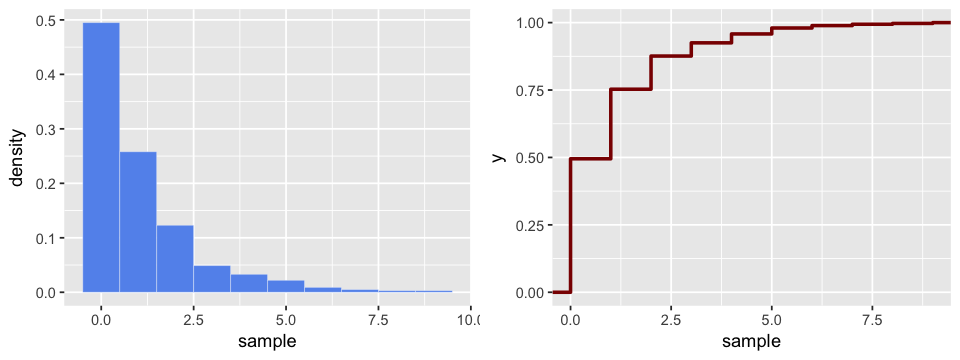

In [44]:
# Размеры картинки 
options(repr.plot.width=8, repr.plot.height=3)

binwidth = 1  # ширина бинов
p1 = ggplot(df, aes(x = sample, binwidth = binwidth))+
        # Наносим гистограмму 
        geom_histogram(aes(y=..density..), binwidth = binwidth, colour = "white", fill = "cornflowerblue", size = 0.1)
                                        # цвет линий разделителей, заливка, толщина линий разделителей


p2 = ggplot(df, aes(x = sample, binwidth = binwidth))+
        stat_ecdf(color = "darkred", size = 1)

# Располагаем графики рядом. Этот код нужен только для юпитерской тетрадки. 
pushViewport(viewport(layout = grid.layout(1, 2)))
print(p1, vp = viewport(layout.pos.row = 1, layout.pos.col = 1))
print(p2, vp = viewport(layout.pos.row = 1, layout.pos.col = 2))

## 6. Непрерывные распределения


In [ ]:
n = 10000

# Нормальное распределение, N(mu, sigma)
mu = 0;  sigma = 1
x <- rnorm(n, mean = mu, sd = sigma)
f <- dnorm
fun_args <- list(mean = mu, sd = sigma)

# Экспоненциальное распределение, Exp(alpha)
# alpha = 0.1
# x <- rexp(n, rate = alpha)
# f <- dexp
# fun_args <- list(rate = alpha)

# Равномерное распределение, U[mn;mx]
# mn=0;   mx=24
# x <- runif(n, min = mn, max = mx)
# f <- dunif
# fun_args <- list(min = mn, max = mx)

df = data.frame(sample = x)

In [ ]:
# Размеры картинки 
options(repr.plot.width=8, repr.plot.height=3)

binwidth = 1  # ширина бинов
p1 = ggplot(df, aes(x = sample, binwidth = binwidth))+
        # Наносим гистограмму 
        geom_histogram(aes(y=..density..), binwidth = binwidth, colour = "white", fill = "cornflowerblue", size = 0.1)+
                                        # цвет линий разделителей, заливка, толщина линий разделителей
        # Наносим плотность распределения
        stat_function(fun = f, args = fun_args, color = "darkred", size = 1)

p2 = ggplot(df, aes(x = sample, binwidth = binwidth))+
        stat_ecdf(color = "darkred", size = 1) + 

# Располагаем графики рядом. Этот код нужен только для юпитерской тетрадки. 
pushViewport(viewport(layout = grid.layout(1, 2)))
print(p1, vp = viewport(layout.pos.row = 1, layout.pos.col = 1))
print(p2, vp = viewport(layout.pos.row = 1, layout.pos.col = 2))

Посмотрим чуть более подробно как меняется плотность и функция распределения для наших непрерывных распределений при изменении значения параметра! 

In [ ]:
options(repr.plot.width=6, repr.plot.height=3)

ggplot(NULL, aes(c(0,10)))+
    stat_function(fun = dexp, args = c(rate=0.1), aes(color = 'a=0.1'), size = 1) +
    stat_function(fun = dexp, args = c(rate=0.5), aes(color = 'a=0.5'), size = 1) +
    stat_function(fun = dexp, args = c(rate=2), aes(color = 'a=2'), size = 1) + 
    stat_function(fun = dexp, args = c(rate=3), aes(color = 'a=3'), size = 1) +
        
    labs(x = "x", y = "f(x)", title = "Exponential Distribution Density Plots", color = "alpha") +
    theme(plot.title = element_text(hjust = 0.5), 
          legend.title = element_text(face="bold", size = 10),
          legend.position = "right")

In [ ]:
options(repr.plot.width=6, repr.plot.height=3)

ggplot(NULL, aes(c(0,10)))+
    stat_function(fun = pexp, args = c(rate=0.1), aes(color = 'a=0.1'), size = 1) +
    stat_function(fun = pexp, args = c(rate=0.5), aes(color = 'a=0.5'), size = 1) +
    stat_function(fun = pexp, args = c(rate=2), aes(color = 'a=2'), size = 1) + 
    stat_function(fun = pexp, args = c(rate=3), aes(color = 'a=3'), size = 1) +
        
    labs(x = "x", y = "f(x)", title = "Exponential Distribution Function", color = "alpha") +
    theme(plot.title = element_text(hjust = 0.5), 
          legend.title = element_text(face="bold", size = 10),
          legend.position = "right")

Ещё немного распределений, о которых мы будем говорить позже! 

In [ ]:
rchisq(5, df=10)      # Хи-квадрат
rt(5, df=10)          # Стьюдента
rf(5, df1=10, df2=5)  # Фишера (F-распределение)

## 5. ЦПТ и равномерные величины

Давайте ещё разок вспомним ЦПТ! 

__Центральная предельная теорема в формулировке Ляпунова:__

Пусть $X_1, \ldots X_n$ случайные величины, имеющие одинаковое распределение с конечными математическим ожиданием и дисперсией. Обычно этот факт записывают вот так:

$$
X_1, \ldots X_n \sim iid(\mu,\sigma^2)
$$

тогда при $n \to \infty$ имеет место сходимость по распределению: 

$$
\frac{X_1 + \ldots X_n - \mu \cdot n}{\sqrt{n} \sigma } \Rightarrow N(0,1)
$$

На практике это означает, что при больших значениях $n$ мы можем апроксимировать распределение некоторой статистики нормальным. Возникает вопрос: __А что такое большие значения n? Когда наступает асимптотика?__ Для разных распределений  и природных явлений она наступает по-разному. Например, удивительно, сумма из равномерно-распределённых случайных величин, довольно быстро становится куполообразной. Давайте посмотрим на это.

In [45]:
n = 10^4
X1 <- runif(n, min = -1, max = 1)
X2 <- runif(n, min = -1, max = 1)
X3 <- runif(n, min = -1, max = 1)
X4 <- runif(n, min = -1, max = 1)
X5 <-runif(n, min = -1, max = 1)

In [46]:
options(repr.plot.width=4, repr.plot.height=3)

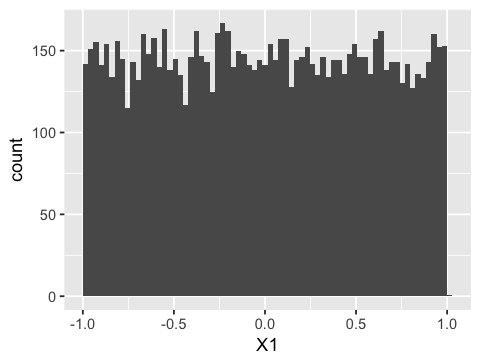

In [47]:
qplot(X1, bins = 70) # гистограма 

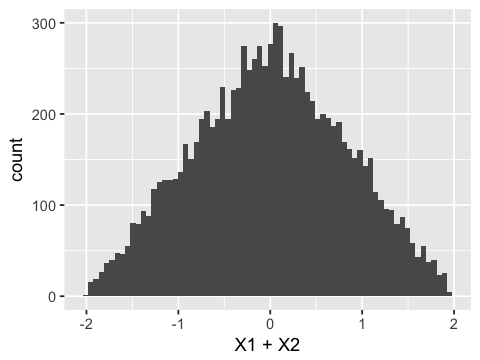

In [48]:
qplot(X1 + X2, bins = 70)

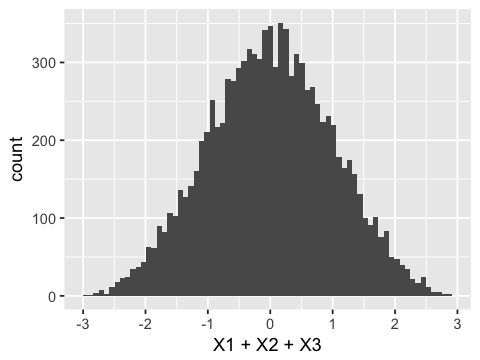

In [49]:
qplot(X1 + X2 + X3, bins = 70)

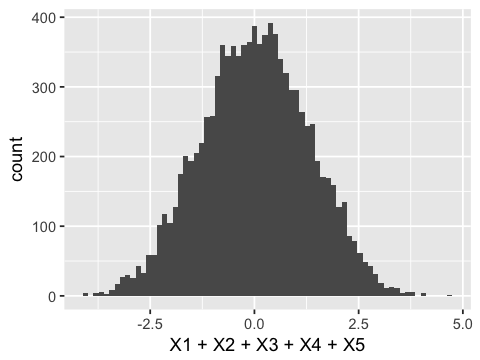

In [50]:
qplot(X1 + X2 + X3 + X4 +X5, bins = 70)

Из довольно медленно сходящихся к нормальному распределений, наверное, можно выделить логнормальное распределение. Попробуйте посмотреть на досуге на его сходимость. 

## Соблюдение авторских прав

* При написании первой части блокнота очень сильно (вплоть до копипасты) использовалась [первая глава](https://github.com/bdemeshev/r_manual_book/blob/master/03_statistics_and_more.Rmd) [учебника по языку R для начинающих от Демешева Б.Б.](https://bdemeshev.github.io/r_manual_book/)


## Почиташки 

*  Ещё один недописаный учебник с [разными распределениями и всяким таким в R](http://www.ievbras.ru/ecostat/Kiril/R/Biblio/R_rus/%C7%E0%F0%FF%E4%EE%E2%20%F7%E0%F1%F2%FC_2.pdf)
*  [Шпаргалка по ggplot2](https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf)
* [15 распределений на все случаи жизни](https://habrahabr.ru/post/311092/) 
